In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import mnist
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt
import glob
from PIL import Image

Using TensorFlow backend.


In [2]:
input_img = Input(shape=(320, 180, 3))


In [3]:
new_dir = '/imgs/'
files = glob.glob(new_dir + '*.jpg')
files = np.random.permutation(files)[:5000]

In [4]:
def open_image(fn): return np.array(Image.open(fn))
imgs = np.stack([open_image(fn) for fn in files])


In [5]:

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

x_train = imgs
print(x_train.shape)
x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 320, 180, 3))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

decoded_imgs = autoencoder.predict(x_train[:10])



(5000, 320, 180, 3)
Epoch 1/10
5000/5000 [==============================] - 70s - loss: 0.4658    
Epoch 2/10
5000/5000 [==============================] - 67s - loss: 0.3531    
Epoch 3/10
5000/5000 [==============================] - 67s - loss: 0.3441    
Epoch 4/10
5000/5000 [==============================] - 67s - loss: 0.3405    
Epoch 5/10
5000/5000 [==============================] - 67s - loss: 0.3377    
Epoch 6/10
5000/5000 [==============================] - 67s - loss: 0.3359    
Epoch 7/10
5000/5000 [==============================] - 67s - loss: 0.3360    
Epoch 8/10
5000/5000 [==============================] - 67s - loss: 0.3249    
Epoch 9/10
5000/5000 [==============================] - 67s - loss: 0.3201    
Epoch 10/10
5000/5000 [==============================] - 67s - loss: 0.3188    


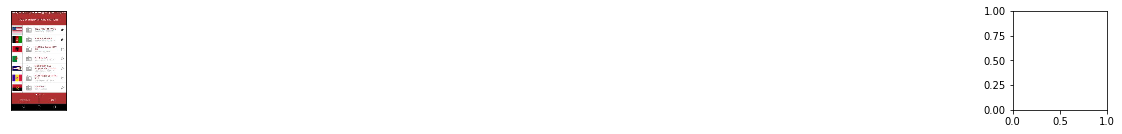

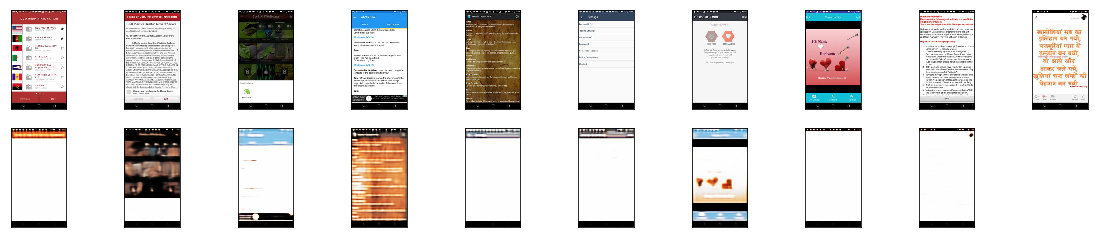

In [7]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, 1+i)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()